### HW 2: Gradient descent


### <font color=green>Solutions</font> <br>

__Total: 25 pts__

Start date: <font color=red>Friday Sept. 13</font> <br>
Due date: <font color=red>Tuesday Sept. 24</font>

In this homework, you will learn to code one of the building block of many learning algorithms. When one wants to fit a model $f_{\beta}$ (with parameters $\beta$) to some training dataset $\mathcal{D}_T$, as we saw in regression, we usually solve an optimization problem of the form 

\begin{align}
\min_{f_{\beta}} \sum_{i\in \mathcal{D}_T} \left|f_{\beta}(x_i) - t_i\right|^2
\end{align}

When the learning model is relatively simple, such as in linear regression, an explicit solution can be computed in closed form as we saw this week. However, for most models (and particularly for the more interesting ones), such explicit expression does not exists or is not straightforward and we thus need an alternative. 

The gradient descent algorithm takes any loss function $\ell(\beta, x)$ for which one wants to find a local minimum, i.e.

\begin{align}
\min_{\beta} \ell(\beta; x, t)
\end{align}

and iterates and the following step

\begin{align}
\beta^{t+1} \leftarrow \beta^{t} - \alpha\; \text{grad}\; f(\beta^t)
\end{align}

for a learning rate $\alpha$. 

As a starting point, consider the following function whose plot is given below. You can uncomment the first line to activate interactive plot on jupyter and use the "plt.ioff()
%matplotlib inline" cell below to turn the interactive mode off

$$f(x,y) =  3(1-x)^2 e^{-(x^2) - (y+1)^2}- 10(x/5 - x^3 - y^5)e^{-x^2-y^2}- \frac{1}{3} e^{-(x+1)^2 - y^2}$$


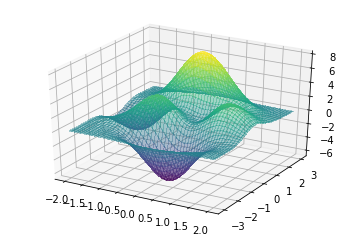

In [38]:
#%matplotlib notebook # use to activate interactive plotting 
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2,2,100)
y = np.linspace(-3,3,100)

xx, yy = np.meshgrid(x, y, indexing='xy')

z = 3*((1-xx)**2) * np.exp(-(xx**2) - (yy+1)**2) \
- 10*(xx/5 - xx**3 - yy**5) * np.exp(-xx**2 - yy**2)- (1/3)* np.exp(-(xx+1)**2 - yy**2)

from matplotlib import cm

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d    


fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, z, cmap=cm.viridis,alpha=.4,
                       linewidth=0, antialiased=False)



plt.show()



__1a.(10 pts)__ Code a function __'gradient_descent'__ that takes as argument a function 'f(x,y)' in two variables and a learning rate $\alpha$ as well as a maximum number of iterations $N$ and return the location $(x,y)$ of a local minimum as well as the value of the function and gradient after the $N$ iterations.

(Hint: note that you don't need to know the explicit expression for the derivative of f(x,y), you can simply use the definition of the derivative 
$$\frac{\partial f}{\partial y} \approx \frac{[f(x, y+h) - f(x,y)]}{h}$$ 
for a sufficiently small step size h and similarly for $x$.



In [192]:
import numpy as np
from numpy import linalg as LA

# First defining the function

def my_function(x,y):

    z = 3*((1-x)**2) * np.exp(-(x**2) - (y+1)**2) \
    - 10*(x/5 - x**3 - y**5) * np.exp(-x**2 - y**2)- (1/3)* np.exp(-(x+1)**2 - y**2)
    
    return z
        

def gradient_descent(my_function,x0,learning_rate, maxIter, h):
    
    # The function computes gradient descent iterations on the function my_function
    # x0 is the starting point
    # learning rate is the step size in x^t = x^t - learning_rate* grad(my_function)
    # epsilon is the desired accuracy
    # maxIter is the maximum number of iterations
    # h is the step size used to compute the derivative
    
    iter =1
    iterations_vec = np.array([.0,.0])
    
    xt = x0

    while (iter<maxIter):
        

        # I start by computing the derivatives at the current point
        
        derivative_x = np.divide((my_function(xt[0]+h,xt[1]) - my_function(xt[0],xt[1])),h)
        derivative_y = np.divide((my_function(xt[0],xt[1]+h) - my_function(xt[0],xt[1])),h)
        grad = [derivative_x, derivative_y]
        grad = np.divide(grad,LA.norm(grad))
        
        xt -= np.multiply(grad, learning_rate)
        iter+=1
                
        #print(iterations_vec)
        iterations_vec = np.vstack((iterations_vec, xt))
        
    return xt, iterations_vec;
    
    
x0 = np.array([0,1.4])
xt, iterations_vec = gradient_descent(my_function,x0,0.05, 200, 0.01)




print(iterations_vec)


[[0.         0.        ]
 [0.00332244 1.35011051]
 [0.00661412 1.30021898]
 [0.0099423  1.25032987]
 [0.01336429 1.20044711]
 [0.01693664 1.15057489]
 [0.02072112 1.10071831]
 [0.02478992 1.05088414]
 [0.0292314  1.0010818 ]
 [0.03415723 0.95132503]
 [0.03971194 0.90163453]
 [0.04608597 0.85204248]
 [0.05353357 0.80260026]
 [0.06239657 0.75339206]
 [0.07313331 0.70455844]
 [0.08634548 0.65633564]
 [0.10277874 0.60911331]
 [0.12323946 0.5634914 ]
 [0.14834476 0.5202511 ]
 [0.17811417 0.48007918]
 [0.21167579 0.44301684]
 [0.24731914 0.40795187]
 [0.28219796 0.37212636]
 [0.30718671 0.32881859]
 [0.26412885 0.30340165]
 [0.31231022 0.31676411]
 [0.26232276 0.31788385]
 [0.31193187 0.32412374]
 [0.26320026 0.31293314]
 [0.31241382 0.3217663 ]
 [0.26293951 0.31453497]
 [0.31229424 0.32254188]
 [0.26302343 0.31403378]
 [0.31233528 0.32230069]
 [0.26299726 0.31419146]
 [0.31232273 0.32237671]
 [0.2630055  0.31414197]
 [0.3123267  0.32235287]
 [0.26300291 0.31415751]
 [0.31232546 0.32236036]


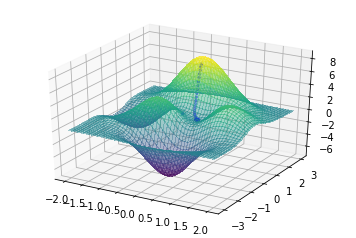

In [193]:
#%matplotlib notebook # use to activate interactive plotting 
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-2,2,100)
y = np.linspace(-3,3,100)

xx, yy = np.meshgrid(x, y, indexing='xy')

z = 3*((1-xx)**2) * np.exp(-(xx**2) - (yy+1)**2) \
- 10*(xx/5 - xx**3 - yy**5) * np.exp(-xx**2 - yy**2)- (1/3)* np.exp(-(xx+1)**2 - yy**2)

from matplotlib import cm

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d    


fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, z, cmap=cm.viridis,alpha=.4,linewidth=0, antialiased=False)


z_iter = my_function(iterations_vec[:,0],iterations_vec[:,1])

ax.scatter(iterations_vec[:,0], iterations_vec[:,1],z_iter, facecolor='blue', marker=".")

plt.show()











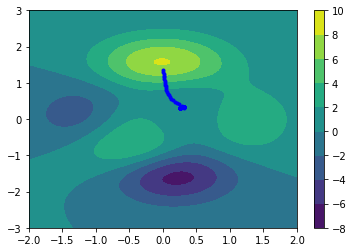

In [194]:
import numpy as np
import matplotlib.pyplot as plt

iterations_vec = iterations_vec[1:] 


x = np.linspace(-2,2,100)
y = np.linspace(-3,3,100)

xx, yy = np.meshgrid(x, y, indexing='xy')

z = 3*((1-xx)**2) * np.exp(-(xx**2) - (yy+1)**2) \
- 10*(xx/5 - xx**3 - yy**5) * np.exp(-xx**2 - yy**2)- (1/3)* np.exp(-(xx+1)**2 - yy**2)


fig, ax = plt.subplots()
ax.contourf(xx, yy, z)
ax.scatter(iterations_vec[:,0], iterations_vec[:,1], facecolor='blue', marker=".")
cbar = fig.colorbar(cs)


plt.show()






#print(iterations_vec[:,0])
#print(iterations_vec[:,1])



__1b.(5pts)__ Extend your algorithm to a function of $D$ variables, $f(x_1, x_2, \ldots, x_D)$

In [ ]:
# The extension is straightforward, 
# just use the approximation for the derivative on every component x1 to xD
# it is done below



__1b.(10 pts)__ Now that you have a gradient descent algorithm, we want to use it on a simple regression problem. Apply your GD iterations to the regression problem below.

- Generate and plot the line $t(x) = \beta_0 + \beta_1 x$ for $\beta_0 = 1$ and $\beta_1 = 2$. (use linspace with 100 points between $-5$ and $5$)

- Generate $20$ samples along the line (use linspace with 20). For each of those samples, generate the data/feature vectors $(t_i, x_i, x_i^2)$ where $t_i$ si defined as 
\begin{align}
t_i = x_i + \varepsilon_i
\end{align}

and $\varepsilon_i$ is some random gaussian noise with mean $0$ and variance $3$.

- Solve the minimization problem 

\begin{align}
\min_{\beta_0, \beta_1, \beta_2} \sum_{i=1}^{20}\left|t_i - \left(\beta_0 + \beta_1x_i + \beta_2 x_i^2\right)\right|^2 + \lambda \|\mathbf{\beta}\|_2^2
\end{align}

where $\mathbf{\beta} = (\beta_0, \beta_1,\beta_2)$, with your gradient descent algorithm. 


- Repeat the steps above for a few values of $\lambda$. For each value of $\lambda$, apply the model you get on a new set of $20$ points between $-5$ and $5$ that you perturb with the same gaussian noise as before, i.e. $t_i = x_i + \varepsilon_i$, apply your model to those __new__ points and compute the error 

\begin{align}
\text{err}(\lambda) = \frac{1}{20}\sum_{i=1}^{20} \left|t_i - \left(\beta_0 + \beta_1x_i +\beta_2 x_i^2 \right)\right|^2
\end{align}

Then plot the values $\text{err}(\lambda)$ as a function of $\lambda$.



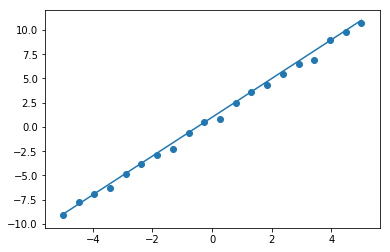

In [140]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

# We start by defining the data 

x = np.linspace(-5,5, 100)

t = 1 + 2*x

xsample = np.linspace(-5,5, 20)
tsample = 1 + 2*xsample
# I then add a .5 noise on the targets to get something sufficiently different from the line
tsample_noisy = tsample+ np.random.normal(0, 0.5, np.shape(xsample))

plt.plot(x, t)
plt.scatter(xsample, tsample_noisy)
plt.show()




In [260]:

xsampleMat = np.ones((20,3))
xsampleMat[:,1] = xsample
xsampleMat[:,2] = xsample**2

xsampleMat = np.transpose(xsampleMat)

#print(xsampleMat)


## We then define the Residual Sum of squares error

def RSS_function(beta,xsampleMat, weight_lambda, targets):

    
    if np.shape(beta) == (1,3):
        beta_x = np.dot(beta, xsampleMat)
    else: 
        beta_x = np.dot(np.transpose(beta), xsampleMat)
        
    err = beta_x - targets
    err = LA.norm(err)**2
    RSS = (1.0/20.0) * err + weight_lambda*LA.norm(beta)**2
    
    return RSS

## I copy paste the gradient descent algorithm. To stay close to the grountruth, I take 
## beta = (beta_0,beta_1, beta_2) = (1,2,0.5)


def gradient_descent(RSS_function,beta_0,learning_rate, maxIter, h, xsampleMat, targets, weight_lambda):
    
    iter =1
    iterations_vec = np.array([.0,.0,.0])
    
    
    ##====================== local version of the RSS function ================##
    def RSS_local(beta):
        
        local_RSS = RSS_function(beta,xsampleMat, weight_lambda, targets)
        
        return local_RSS
    ##==========================================================================##
    
    
    beta_t = beta_0

    while (iter<maxIter):
        
        # displaying the error 
        print "iter # " + str(iter) + ", error: " + str(RSS_local(beta_t))
        
    
        # I start by computing the derivatives at the current point
        
        # calculating the derivatives with respect to beta at beta_0
        gradient_beta = np.zeros((3,)) 
        for l in range(0,3):
            e_l = np.zeros((3,))
            e_l[l] = 1
            gradient_beta[l] = np.divide(RSS_local(beta_t + h*e_l) - RSS_local(beta_t), h)
        
        # Normalizing 
        if LA.norm(gradient_beta) !=0:
            gradient_beta = np.divide(gradient_beta,LA.norm(gradient_beta))
        else:
            gradient_beta = 0
            
        
        beta_t -= np.multiply(gradient_beta, learning_rate)
        iter+=1
        
        
        iterations_vec = np.vstack((iterations_vec, beta_t))
        
    return beta_t, iterations_vec;
    
    
beta0 = np.array([1,2,0.5])
beta_t, iterations_vec = gradient_descent(RSS_function,beta0,0.01, 1000, 0.001, xsampleMat, tsample_noisy, 0.0)
print(beta_t)

iter # 1, error: 37.86057526752858
iter # 2, error: 36.358067824817134
iter # 3, error: 34.88611024196961
iter # 4, error: 33.44470251655681
iter # 5, error: 32.03384464599375
iter # 6, error: 30.653536627526087
iter # 7, error: 29.303778458214783
iter # 8, error: 27.98457013491938
iter # 9, error: 26.695911654278987
iter # 10, error: 25.43780301269119
iter # 11, error: 24.210244206288287
iter # 12, error: 23.013235230910475
iter # 13, error: 21.84677608207569
iter # 14, error: 20.71086675494533
iter # 15, error: 19.605507244285356
iter # 16, error: 18.530697544421884
iter # 17, error: 17.486437649190396
iter # 18, error: 16.47272755187738
iter # 19, error: 15.489567245153001
iter # 20, error: 14.536956720993155
iter # 21, error: 13.614895970588723
iter # 22, error: 12.723384984239514
iter # 23, error: 11.862423751229661
iter # 24, error: 11.032012259680393
iter # 25, error: 10.232150496375114
iter # 26, error: 9.462838446550254
iter # 27, error: 8.724076093643534
iter # 28, error: 8.0

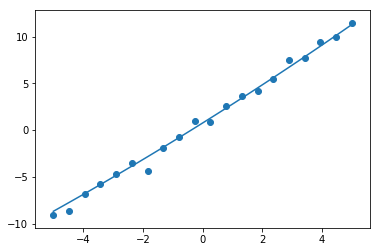

In [261]:
# Now I plot the prediction on top of the data

data_plot = np.linspace(-5,5, 100)

predict = beta_t[0] + beta_t[1]*data_plot + beta_t[2]*data_plot**2

plt.plot(data_plot, predict)
plt.scatter(xsample, tsample_noisy)
plt.show()

iter # 1, error: 39.91990905404768
iter # 2, error: 39.501544070839934
iter # 3, error: 39.090150025059216
iter # 4, error: 38.68515204988489
iter # 5, error: 38.286020323674464
iter # 6, error: 37.89227052752538
iter # 7, error: 37.503463353669936
iter # 8, error: 37.119203203323735
iter # 9, error: 36.739136232452346
iter # 10, error: 36.36294790896032
iter # 11, error: 35.99036023778255
iter # 12, error: 35.62112879470661
iter # 13, error: 35.255039688934716
iter # 14, error: 34.891906551431056
iter # 15, error: 34.53156762334165
iter # 16, error: 34.17388299782742
iter # 17, error: 33.818732050455594
iter # 18, error: 33.466011078245025
iter # 19, error: 33.115631155564586
iter # 20, error: 32.7675162060972
iter # 21, error: 32.42160128362659
iter # 22, error: 32.07783105004912
iter # 23, error: 31.736158436333355
iter # 24, error: 31.396543470757436
iter # 25, error: 31.058952258314424
iter # 26, error: 30.723356095411482
iter # 27, error: 30.38973070468219
iter # 28, error: 30.05

iter # 750, error: 0.22666191950602307
iter # 751, error: 0.2251408418359736
iter # 752, error: 0.22665895518129642
iter # 753, error: 0.22513792094732388
iter # 754, error: 0.22665608296806541
iter # 755, error: 0.22513509103572338
iter # 756, error: 0.22665330047827378
iter # 757, error: 0.2251323497407019
iter # 758, error: 0.22665060538175671
iter # 759, error: 0.22512969475902828
iter # 760, error: 0.22664799540487493
iter # 761, error: 0.2251271238433642
iter # 762, error: 0.22664546832918653
iter # 763, error: 0.22512463480094627
iter # 764, error: 0.2266430219901451
iter # 765, error: 0.22512222549230199
iter # 766, error: 0.22664065427583086
iter # 767, error: 0.22511989382999392
iter # 768, error: 0.22663836312571176
iter # 769, error: 0.22511763777739333
iter # 770, error: 0.22663614652942893
iter # 771, error: 0.22511545534748076
iter # 772, error: 0.22663400252561608
iter # 773, error: 0.2251133446016779
iter # 774, error: 0.2266319292007423
iter # 775, error: 0.2251113036

iter # 729, error: 0.4070679761784064
iter # 730, error: 0.4055426090350025
iter # 731, error: 0.4070559651314066
iter # 732, error: 0.40553074875668066
iter # 733, error: 0.40704427171774005
iter # 734, error: 0.40551920241365713
iter # 735, error: 0.4070328881741276
iter # 736, error: 0.4055079623301537
iter # 737, error: 0.4070218069206883
iter # 738, error: 0.4054970210117539
iter # 739, error: 0.4070110205566736
iter # 740, error: 0.40548637114118685
iter # 741, error: 0.40700052185630453
iter # 742, error: 0.4054760055742044
iter # 743, error: 0.40699030376469775
iter # 744, error: 0.4054659173355588
iter # 745, error: 0.40698035939389365
iter # 746, error: 0.4054560996150704
iter # 747, error: 0.40697068201897074
iter # 748, error: 0.4054465457637868
iter # 749, error: 0.4069612650742504
iter # 750, error: 0.4054372492902285
iter # 751, error: 0.40695210214959315
iter # 752, error: 0.4054282038567257
iter # 753, error: 0.40694318698677456
iter # 754, error: 0.405419403275835
ite

iter # 377, error: 0.21830643454346277
iter # 378, error: 0.21941049291258038
iter # 379, error: 0.217520674571146
iter # 380, error: 0.21863440779010626
iter # 381, error: 0.21675321391063132
iter # 382, error: 0.21787639848494958
iter # 383, error: 0.21600362993080313
iter # 384, error: 0.21713604751344176
iter # 385, error: 0.21527150972383732
iter # 386, error: 0.2164129469966389
iter # 387, error: 0.2145564498818085
iter # 388, error: 0.2157066984396775
iter # 389, error: 0.21385805627843502
iter # 390, error: 0.21501691251619315
iter # 391, error: 0.2131759438558436
iter # 392, error: 0.21434320885769573
iter # 393, error: 0.21250973641622908
iter # 394, error: 0.21368521584778752
iter # 395, error: 0.2118590664183047
iter # 396, error: 0.21304257042110228
iter # 397, error: 0.2112235747784308
iter # 398, error: 0.21241491786687236
iter # 399, error: 0.2106029106763129
iter # 400, error: 0.21180191163700124
iter # 401, error: 0.2099967313651627
iter # 402, error: 0.21120321315855

iter # 354, error: 0.28673437898537546
iter # 355, error: 0.287473669851635
iter # 356, error: 0.2852588003098216
iter # 357, error: 0.28601618554174607
iter # 358, error: 0.2838174337439828
iter # 359, error: 0.2845924958656844
iter # 360, error: 0.2824094906787747
iter # 361, error: 0.2832018218376899
iter # 362, error: 0.28103420064006096
iter # 363, error: 0.28184340238449385
iter # 364, error: 0.279690810871623
iter # 365, error: 0.2805164939334876
iter # 366, error: 0.2783785859277474
iter # 367, error: 0.2792203700103619
iter # 368, error: 0.27709680727520886
iter # 369, error: 0.2779543208460337
iter # 370, error: 0.2758447729044185
iter # 371, error: 0.2767176529926245
iter # 372, error: 0.2746217969495444
iter # 373, error: 0.27550968894828937
iter # 374, error: 0.27342720931737274
iter # 375, error: 0.2743297667906793
iter # 376, error: 0.27226035532473297
iter # 377, error: 0.2731772398188497
iter # 378, error: 0.27112059534426336
iter # 379, error: 0.2720514762034211
iter 

iter # 333, error: 0.26841283104174235
iter # 334, error: 0.2694481592868937
iter # 335, error: 0.2674970749159759
iter # 336, error: 0.2685436652546694
iter # 337, error: 0.2666026194178404
iter # 338, error: 0.26766021180666905
iter # 339, error: 0.26572897287477476
iter # 340, error: 0.2667973132584897
iter # 341, error: 0.2648756549236856
iter # 342, error: 0.26595449509742997
iter # 343, error: 0.26404219625110925
iter # 344, error: 0.2651312937257954
iter # 345, error: 0.26322813833934894
iter # 346, error: 0.2643272562101155
iter # 347, error: 0.2624330332184392
iter # 348, error: 0.2635419400361228
iter # 349, error: 0.2616564432238167
iter # 350, error: 0.26277491286937216
iter # 351, error: 0.2608979407595585
iter # 352, error: 0.2620257523213686
iter # 353, error: 0.26015710806705944
iter # 354, error: 0.2612940457210607
iter # 355, error: 0.25943353699903166
iter # 356, error: 0.26057938989159596
iter # 357, error: 0.2587268287986903
iter # 358, error: 0.2598813909322092
it

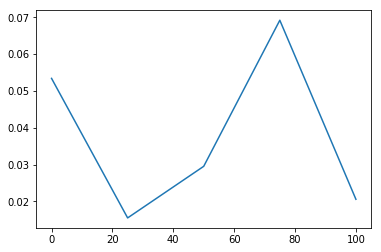

In [264]:
# Finally, you were asked to ask to validate your model on new pairs (x, t) 
# generated at random, for a few values of lambda

# I start by building a vector encoding a few values for lambda. 

lambda_test = np.linspace(0,100,5)

sz = lambda_test.size

validation_error = np.zeros((sz,))

# For this exercise I keep starting from [0,0,0]
for k in range(0,sz):
    
    beta0 = np.array([0.0,0.0,0.0])
    beta_t, iterations_vec = gradient_descent(RSS_function,beta0,0.01, 1000, 0.001, xsampleMat, tsample_noisy, 0.0)
    
    # I then compute the prediction for the value of lambda
    
    x_validation = np.linspace(-5,5, 20)
    t_validation = 1 + 2*x_validation
    tsample_noisy = tsample+ np.random.normal(0, 0.5, np.shape(xsample))

    predict = beta_t[0] + beta_t[1]*xsample + beta_t[2]*xsample**2
    deviation_validation  = predict - t_validation
    validation_error[k] = (1.0/20.0) * LA.norm(deviation_validation)**2

    
    

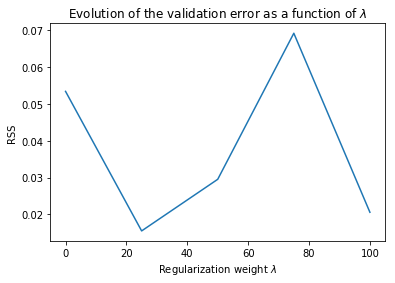

In [268]:
plt.plot(lambda_test, validation_error)

plt.title('Evolution of the validation error as a function of $\lambda$')

plt.xlabel('Regularization weight $\lambda$')
plt.ylabel('RSS')

plt.show()




[0.05339829 0.01550124 0.02951719 0.06918464 0.02056423]
